In [125]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
filename = "../data/train.csv"
filetest = "../data/test.csv"

In [127]:
df_train = pd.read_csv(filename)
df_test = pd.read_csv(filetest)
# Displaying an overview of the data
data_overview = {
    "Number of Rows": df_train.shape[0],
    "Number of Columns": df_train.shape[1],
    "Column Names": df_train.columns.tolist(),
    "First 5 Rows": df_train.head()
}

data_overview

{'Number of Rows': 7905,
 'Number of Columns': 20,
 'Column Names': ['id',
  'N_Days',
  'Drug',
  'Age',
  'Sex',
  'Ascites',
  'Hepatomegaly',
  'Spiders',
  'Edema',
  'Bilirubin',
  'Cholesterol',
  'Albumin',
  'Copper',
  'Alk_Phos',
  'SGOT',
  'Tryglicerides',
  'Platelets',
  'Prothrombin',
  'Stage',
  'Status'],
 'First 5 Rows':    id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
 0   0     999  D-penicillamine  21532   M       N            N       N     N   
 1   1    2574          Placebo  19237   F       N            N       N     N   
 2   2    3428          Placebo  13727   F       N            Y       Y     Y   
 3   3    2576          Placebo  18460   F       N            N       N     N   
 4   4     788          Placebo  16658   F       N            Y       N     N   
 
    Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
 0        2.3          316     3.35     172    1601.0  179.80             63   
 1        

In [128]:
# Grouping 'C' (censored or alive) and 'CL' (alive due to liver transplant) in the Status column
df_train['Status_Grouped'] = df_train['Status'].replace({'C': 'C/CL', 'CL': 'C/CL'})

# Showing the first few rows to verify the grouping
df_train[['Status', 'Status_Grouped']].head()

,Status,Status_Grouped
0,D,D
1,C,C/CL
2,D,D
3,C,C/CL
4,C,C/CL


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Dropping non-numeric and target variable for feature set
X = df_train.drop(['Status', 'Status_Grouped', 'id'], axis=1)

# Target variable
y = df_train['Status_Grouped']

# Encoding the target variable: 'D' as 0 and 'C/CL' as 1
y_encoded = np.where(y == 'D', 0, 1)

# Identifying categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Creating a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Scaling the data
    ('classifier', LogisticRegression())
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Training the logistic regression model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(conf_matrix)


[[ 529  313]
 [ 140 1390]]


In [130]:
df_train.dtypes

id                  int64
N_Days              int64
Drug               object
Age                 int64
Sex                object
Ascites            object
Hepatomegaly       object
Spiders            object
Edema              object
Bilirubin         float64
Cholesterol         int64
Albumin           float64
Copper              int64
Alk_Phos          float64
SGOT              float64
Tryglicerides       int64
Platelets           int64
Prothrombin       float64
Stage               int64
Status             object
Status_Grouped     object
dtype: object

In [131]:
df_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [132]:
# Calculating the decreased rate (mortality rate) for men and women

# Filtering the data by Status 'D' for deceased patients
deceased = df_train[df_train['Status'] == 'D']

# Counting the number of deceased men and women
deceased_counts = deceased['Sex'].value_counts()

# Counting the total number of men and women in the dataset
total_counts = df_train['Sex'].value_counts()

# Calculating the decreased rate for men and women
decreased_rate = deceased_counts / total_counts

decreased_rate

F    0.320338
M    0.553603
Name: Sex, dtype: float64

In [133]:
# Finding the range of values for each column, considering different types of data

# Function to determine the range for numerical and categorical columns
def determine_range(column):
    if column.dtype == 'object':  # For categorical data
        return column.unique().tolist()
    else:  # For numerical data
        return [column.min(), column.max()]

# Applying the function to each column in the dataframe
column_ranges = {col: determine_range(df_train[col]) for col in df_train.columns}

column_ranges



{'id': [0, 7904],
 'N_Days': [41, 4795],
 'Drug': ['D-penicillamine', 'Placebo'],
 'Age': [9598, 28650],
 'Sex': ['M', 'F'],
 'Ascites': ['N', 'Y'],
 'Hepatomegaly': ['N', 'Y'],
 'Spiders': ['N', 'Y'],
 'Edema': ['N', 'Y', 'S'],
 'Bilirubin': [0.3, 28.0],
 'Cholesterol': [120, 1775],
 'Albumin': [1.96, 4.64],
 'Copper': [4, 588],
 'Alk_Phos': [289.0, 13862.4],
 'SGOT': [26.35, 457.25],
 'Tryglicerides': [33, 598],
 'Platelets': [62, 563],
 'Prothrombin': [9.0, 18.0],
 'Stage': [1, 4],
 'Status': ['D', 'C', 'CL'],
 'Status_Grouped': ['D', 'C/CL']}

In [134]:
# Identify object-type columns
object_columns = df_train.select_dtypes(include=['object']).columns
# Grouping 'C' (censored or alive) and 'CL' (alive due to liver transplant) in the Status column
df_train['Status'] = df_train['Status'].replace({'C': 'C/CL', 'CL': 'C/CL'})
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert object-type columns to numerical
for col in object_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    if col != 'Status':
        df_test[col] = label_encoder.fit_transform(df_test[col])

df_train = df_train.drop('id', axis=1)
df_train.head()
df_test.head()

KeyError: 'Status_Grouped'

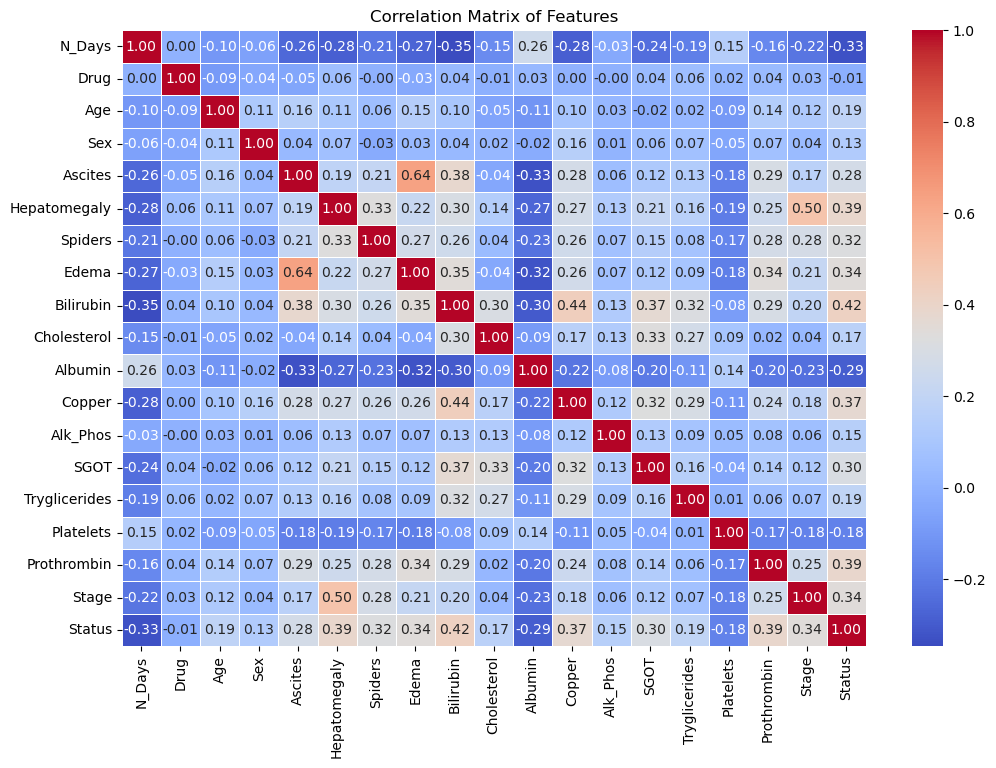

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df_train.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

### Linear Regression

In [ ]:
X = df_train.drop('Status', axis=1)
y = df_train['Status']
# print(X_train)
# print(y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
4542,1356,1,19221,0,0,0,0,0,0.9,309,3.46,41,911.0,77.50,93,295,10.9,3
7430,1592,0,12120,0,0,1,1,0,1.2,316,3.42,70,1257.0,122.45,114,295,9.8,2
6258,1271,0,22111,0,0,0,0,0,0.7,252,3.68,20,688.0,57.35,56,265,10.1,1
3452,2475,0,27398,0,0,1,0,0,1.2,288,3.37,32,791.0,57.35,114,248,10.7,2
4005,1978,1,20708,0,0,1,0,0,0.8,223,3.70,39,884.0,75.95,104,224,11.2,4


In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)    
print(linear_regression_model.score(X_test,y_test))

0.40550479927103333
